# Zadanie 6
Wczytaj zbiór danych "20 Newsgroups" dostępny w bibliotece scikit-learn. Wykonaj przetwarzanie tekstu, aby oczyścić i przekształcić dokumenty na wektory cech, na przykład używając
technik takich jak tokenizacja, usuwanie stop words, stemming itp. Zastosuj metodę LDA do
zredukowania wymiarowości danych. Przeprowadź analizę wyników, aby zidentyfikować
główne tematy lub kategorie w zbiorze danych. Przedstaw wyniki na wykresie, pokazując przyporządkowanie dokumentów do poszczególnych tematów wyodrębnionych za pomocą LDA.
20 newsgroups dataset to zestaw danych zawierający zbiór artykułów z 20 różnych grup dyskusyjnych online, z etykietami kategorii, do których należy każdy artykuł. Może być wykorzystywany do redukcji wymiarowości tekstu.

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt

C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


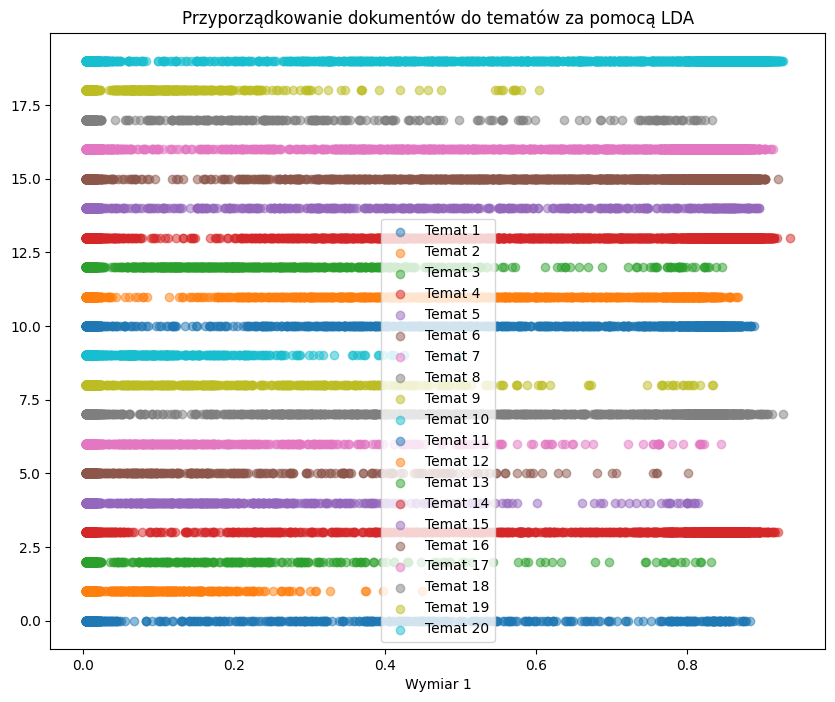

In [4]:
# Wczytanie danych
news = fetch_20newsgroups()

# Przetwarzanie tekstu
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(news.data)

# Redukcja wymiarów za pomocą LDA
lda = LDA(n_components=20)  # Zakładamy, że chcemy znaleźć 20 tematów
X_lda = lda.fit_transform(X)

# Analiza wyników
plt.figure(figsize=(10, 8))
for i in range(X_lda.shape[1]):
    plt.scatter(X_lda[:, i], np.zeros_like(X_lda[:, i]) + i, alpha=0.5, label=f'Temat {i+1}')
    

plt.xlabel('Wymiar 1')
plt.title('Przyporządkowanie dokumentów do tematów za pomocą LDA')
plt.legend()
plt.show()

# Wnioski
Możemy zauważyć że po zastosowaniu metody LDA dostaliśmy wyraźny podział wiadomości na tematy.